## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2) * np.sum(np.square(predictions-y))
    return cost

In [15]:
def stocashtic_gradient_descent(X, y, theta, learning_rate=1e-4, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost
    return theta, cost_history   

In [16]:
def gradient_descent(X, y, theta, learning_rate=1e-4, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):   
        prediction = np.dot(X,theta)
        theta = theta - learning_rate*((X.T).dot((prediction - y)))
        cost_history[it]  = cal_cost(theta,X,y)
    return theta, cost_history

In [17]:
def minibatch_gradient_descent(X, y, theta, learning_rate=1e-4, iterations=100, batch_size =10):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            prediction = np.dot(X_i,theta)
            theta = theta - learning_rate*(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [18]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

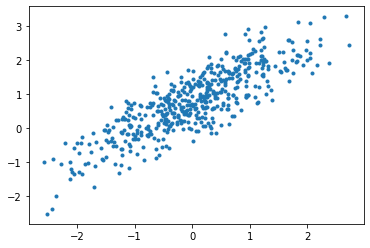

In [19]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [20]:
theta = np.random.rand(2, 1)
l_r = 1e-4
n_iter = 100
X_b = np.c_[x_train, np.ones((len(x_train), 1))]
y_train = np.expand_dims(y_train, axis=1)
theta_best = np.linalg.inv(X_b.dot(X_b.T)).dot(X_b).dot(y_train)
print(theta_best)
'''print(X_b.shape)'''
theta, cost_history = gradient_descent(X_b, y_train, theta, l_r, n_iter)

[[0.78456508]
 [0.81797038]]


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

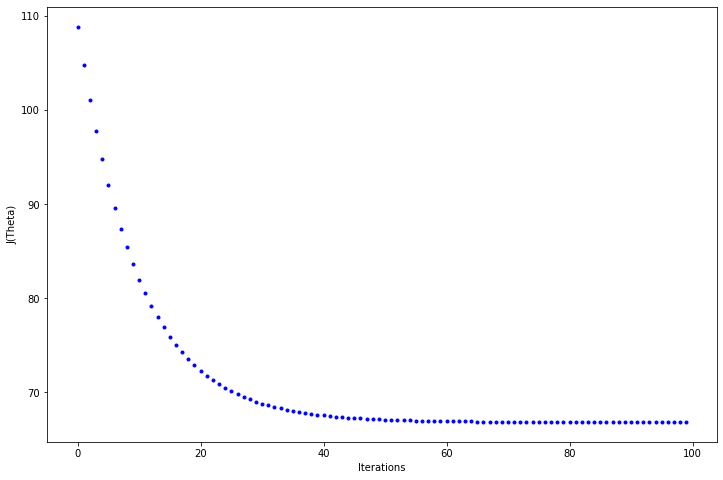

In [21]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ = ax.plot(range(n_iter), cost_history, 'b.')

In [22]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']
X_test_b = np.c_[np.ones((len(x_test), 1)), x_test]

In [23]:
y_pred = np.dot(X_test_b, theta)
MSE = 0.0
y_test = np.expand_dims(y_test, axis=1)
MSE = cal_cost(theta, X_test_b, y_test)

In [24]:
print('weights:          {:0.3f},\nintercepts:          {:0.3f}'.format(theta[0][0], theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(MSE))

weights:          0.784,
intercepts:          0.815
Final cost/MSE:  3.449
